# Assignment 4

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [5]:
x_train=train_datagen.flow_from_directory(r'E:\AIML_Externship\Contents\Cars_Dataset\train',target_size=(64,64),class_mode = 'categorical',batch_size=100)

Found 3352 images belonging to 7 classes.


In [6]:
len(x_train)

34

In [7]:
x_test=test_datagen.flow_from_directory(r'E:\AIML_Externship\Contents\Cars_Dataset\test',target_size=(64,64),class_mode = 'categorical',batch_size=100)

Found 813 images belonging to 7 classes.


In [8]:
len(x_test)

9

In [9]:
x_train.class_indices

{'Audi': 0,
 'Hyundai Creta': 1,
 'Mahindra Scorpio': 2,
 'Rolls Royce': 3,
 'Swift': 4,
 'Tata Safari': 5,
 'Toyota Innova': 6}

# Import libraries

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

# Create the model

In [11]:
model = Sequential()

# Add layers

In [12]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())

In [15]:
#hidden layer - 1
model.add(Dense(300,activation = 'relu'))

In [16]:
#hiddenlayer - 2
model.add(Dense(150,activation='relu'))

In [17]:
#output layer
model.add(Dense(7,activation='softmax'))

# Compile the model

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fit the model

In [19]:
#model.fit_generator(x_train,steps_per_epoch = len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

#model.fit_generator(x_train,steps_per_epoch = len(x_train),epochs=10,validation_data = x_test,validation_steps=len(x_test))

#model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10)

model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

C:\Users\RAJVEE~1\AppData\Local\Temp/ipykernel_16088/1177999562.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
34/34 [==============================] - 12s 335ms/step - loss: 3.0998 - accuracy: 0.2363 - val_loss: 1.7978 - val_accuracy: 0.3050
Epoch 2/10
34/34 [==============================] - 11s 336ms/step - loss: 1.7031 - accuracy: 0.3941 - val_loss: 1.6267 - val_accuracy: 0.3813
Epoch 3/10
34/34 [==============================] - 12s 346ms/step - loss: 1.4527 - accuracy: 0.4902 - val_loss: 1.4039 - val_accuracy: 0.5043
Epoch 4/10
34/34 [==============================] - 12s 337ms/step - loss: 1.1822 - accuracy: 0.6050 - val_loss: 1.3147 - val_accuracy: 0.5178
Epoch 5/10
34/34 [==============================] - 11s 323ms/step - loss: 0.9446 - accuracy: 0.6930 - val_loss: 1.2274 - val_accuracy: 0.5855
Epoch 6/10
34/34 [==============================] - 11s 326ms/step - loss: 0.7345 - accuracy: 0.7754 - val_loss: 1.1857 - val_accuracy: 0.5990
Epoch 7/10
34/34 [==============================] - 11s 329ms/step - loss: 0.5179 - accuracy: 0.8580 - val_loss: 1.1863 - val_accuracy: 0.6015

In [20]:
model.save('cars.h5')

# Testing the CNN model

In [21]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model = load_model('cars.h5')

In [23]:
img = image.load_img(r'E:\AIML_Externship\Contents\Cars_Dataset\test\Rolls Royce\101.jpg',target_size=(64,64))

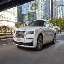

In [24]:
img

In [25]:
x=image.img_to_array(img)

In [26]:
x.ndim

3

In [27]:
x=np.expand_dims(x,axis=0)

In [28]:
x

array([[[[  6.,   5.,  13.],
         [ 16.,  15.,  23.],
         [ 18.,  17.,  25.],
         ...,
         [160., 172., 188.],
         [159., 171., 187.],
         [229., 232., 237.]],

        [[  6.,   5.,  13.],
         [ 22.,  21.,  29.],
         [ 36.,  35.,  43.],
         ...,
         [152., 165., 181.],
         [154., 167., 183.],
         [190., 188., 191.]],

        [[ 46.,  45.,  53.],
         [ 52.,  51.,  59.],
         [ 51.,  50.,  58.],
         ...,
         [159., 175., 190.],
         [164., 180., 195.],
         [160., 172., 186.]],

        ...,

        [[ 78.,  76.,  79.],
         [ 76.,  74.,  77.],
         [ 77.,  75.,  78.],
         ...,
         [100.,  98.,  99.],
         [ 98.,  96.,  97.],
         [ 94.,  92.,  93.]],

        [[ 74.,  74.,  76.],
         [ 73.,  73.,  75.],
         [ 75.,  75.,  77.],
         ...,
         [ 96.,  94.,  95.],
         [ 99.,  97.,  98.],
         [101.,  95.,  97.]],

        [[ 70.,  70.,  72.],
       

In [29]:
x.ndim

4

In [30]:
pred=np.argmax(model.predict(x),axis=1)

In [31]:
pred

array([6], dtype=int64)

In [32]:
index = ['Audi','Hyundai Creta','Mahindra Scorpio','Rolls Royce','Swift','Tata Safari','Toyota Innova']
print(index[pred[0]])

Toyota Innova


# Open CV

In [33]:
import cv2

In [34]:
img = cv2.imread(r'E:\AIML_Externship\Contents\Cars_Dataset\test\Rolls Royce\101.jpg',1)

In [35]:
img

array([[[  7,   0,   0],
        [  7,   0,   0],
        [  9,   1,   2],
        ...,
        [242, 234, 227],
        [235, 231, 226],
        [231, 227, 222]],

       [[ 10,   2,   3],
        [ 11,   3,   4],
        [ 13,   5,   6],
        ...,
        [239, 233, 228],
        [234, 231, 227],
        [231, 226, 223]],

       [[ 14,   6,   7],
        [ 14,   6,   7],
        [ 15,   7,   8],
        ...,
        [228, 221, 218],
        [221, 219, 218],
        [221, 217, 216]],

       ...,

       [[ 72,  70,  70],
        [ 72,  70,  70],
        [ 72,  70,  70],
        ...,
        [ 97,  96, 100],
        [ 96,  95,  99],
        [ 96,  95,  99]],

       [[ 73,  71,  71],
        [ 72,  70,  70],
        [ 72,  70,  70],
        ...,
        [ 94,  93,  97],
        [ 94,  93,  97],
        [ 94,  93,  97]],

       [[ 74,  72,  72],
        [ 74,  72,  72],
        [ 74,  72,  72],
        ...,
        [ 91,  90,  94],
        [ 91,  90,  94],
        [ 90,  89,  93]]

In [36]:
img1 = cv2.imread(r'E:\AIML_Externship\Contents\Cars_Dataset\test\Rolls Royce\101.jpg',0)

In [37]:
img1

array([[  0,   0,   2, ..., 233, 230, 226],
       [  3,   4,   6, ..., 232, 230, 226],
       [  7,   7,   8, ..., 221, 219, 217],
       ...,
       [ 70,  70,  70, ...,  97,  96,  96],
       [ 71,  70,  70, ...,  94,  94,  94],
       [ 72,  72,  72, ...,  91,  91,  90]], dtype=uint8)

In [38]:
print(img.shape)

(183, 275, 3)


In [39]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# CNN Video Analysis

In [40]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('cars.h5')
video=cv2.VideoCapture(0)
index=['Audi','Hyundai Creta','Mahindra Scorpio','Rolls Royce','Swift','Tata Safari','Toyota Innova']
while 1:
    succes,frame=video.read()
    cv2.imwrite('image.jpg',frame)
    img=image.load_img('image.jpg',target_size=(64,64))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=np.argmax(model.predict(x),axis=1)
    y=pred[0]
    cv2.putText(frame,'The predicted Cars is: '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()